## Thomas Fire(2017) False Color

Author: Stephen Carroll

This project can be found at [https://github.com/stephenccodes/eds220-hwk4](https://github.com/stephenccodes/eds220-hwk4)

###  Landsat Collection 2 Level-2

 This data is a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite.
The data was retrieved from the Microsof Planetary Computer data catalogue and pre-processed to remove data outside land and coarsen the spatial resolution.

Date accessed: 11/19/24

Original dats source:

[https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr

# Establish a file path for the landsat data
fp = os.path.join('data/landsat8-2018-01-26-sb-simplified.nc')

# Import the landsat data
landsat = rioxr.open_rasterio(fp)

In [2]:
# Explore the data
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

In [3]:
# Find the CRS of the landsat data
print('CRS', landsat.rio.crs)

CRS EPSG:32611


In [4]:
# Find the dimensions of the landsat data
print('Height: ', landsat.rio.height)
print('Width: ', landsat.rio.width)

Height:  731
Width:  870


In [5]:
# Find the data type of the landsat data
print('Data type: \n', landsat.dtypes)

Data type: 
 Frozen({'red': dtype('float64'), 'green': dtype('float64'), 'blue': dtype('float64'), 'nir08': dtype('float64'), 'swir22': dtype('float64')})


In [6]:
# Find the geographic extent of the landsat data
print(landsat.rio.bounds(), '\n')

(121170.0, 3755160.0, 356070.0, 3952530.0) 



### Data Exploration Summary

To begin, I viewed the landsat data to learn more about it. XXXXXX

In [7]:
# Remove the first dimension(band) and drop the associated coordinates
landsat = landsat.squeeze().drop_vars('band')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


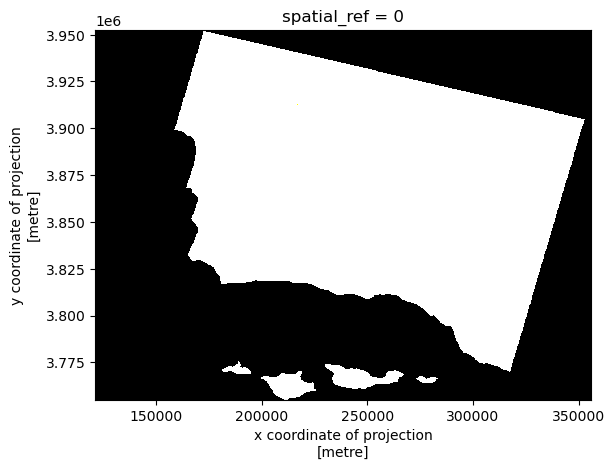

In [25]:
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

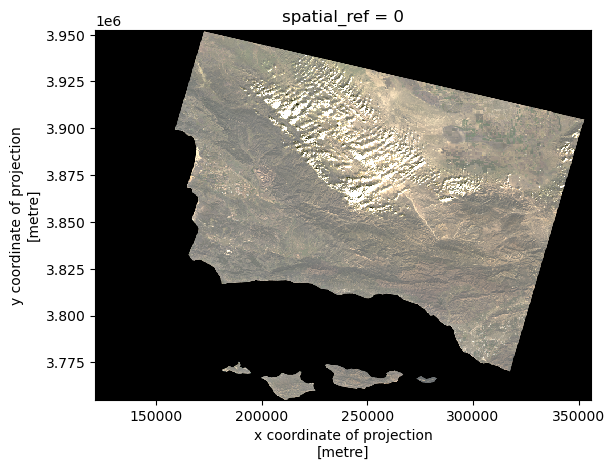

In [27]:
# Remove the exterem values caused by cloud cover and plot it again
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

In [23]:
# PLot the raster
landsat.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)